Linear Regression based approach - This classifies neurological disorders by learning the relationship between neurological conditions and the component frequencies of EEG data found using a Fourier transform

To run this file, edit `TRAINPATH` in the second block to match the name of the dataset used to train this model. Generate this with **fft** formatting, **15000** samples, and **balanced** formatting using `generate_transformed_dataset.ipynb`

In [1]:
import numpy as np
import pandas as pd
import sklearn.datasets as skdata
import sklearn.metrics as skmetrics
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression

In [4]:
# MAKE SURE TO CHANGE THIS TO THE LOCAL PATH TO DATA
#TRAIN_PATH = "../augmented_train/reformatted_train_10000_samples.csv"
TRAIN_PATH = "train_1998_samples_fft_0_to_10_hz_consensus_1.0_balanced.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

[[1067.3480224609375 37351.03003342077 15359.664447939662 ...
  2.858362466241881 -1.0385631615575233 'GRDA']
 [3996.4853515625 19218.74002324976 7220.113022527313 ...
  -2.541654289304361 -0.3985117129560701 'Seizure']
 [978.2941284179688 122135.54007002711 4660.511109816188 ...
  -1.645929065597091 2.9721340056392287 'GPD']
 ...
 [532.9072265625 9911.529991749674 3575.858491623403 ...
  0.5581263301616644 3.12467148276498 'LPD']
 [2080.953369140625 148785.25964328647 5830.51786124386 ...
  -0.8368241158142106 2.0012016397379093 'GRDA']
 [13023.8525390625 27559.909980563447 85987.51750663313 ...
  1.762726915068119 3.0654146678928518 'GPD']]
(1989, 2421)


In [5]:
num_input = data_np.shape[1] - 1

x = data_np[:, 0:num_input]
y = data_np[:, num_input]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [6]:
# Create the model
model_scikit = LogisticRegression()

# Train
model_scikit.fit(x_train, y_train)
predictions_train = model_scikit.predict(x_train)
score_train = model_scikit.score(x_train, y_train)
print('Training Accuracy: {:.4f}'.format(score_train))

# Validate
predictions_val = model_scikit.predict(x_val)
score_val = model_scikit.score(x_val, y_val)
print('Validation Accuracy: {:.4f}'.format(score_val))

# Test
predictions_test = model_scikit.predict(x_test)
score_test = model_scikit.score(x_test, y_test)
print('Test Accuracy: {:.4f}'.format(score_test))

c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Training Accuracy: 0.3771
Validation Accuracy: 0.3116
Test Accuracy: 0.3367


In [7]:
# Test out a number of models
models = []
val_scores = []
solvers = ['liblinear', 'newton-cg', 'lbfgs', 'sag', 'saga']  
num_iterations = [100, 150, 200, 500]

for solver in solvers:

    for iter in num_iterations:

        model = LogisticRegression(solver=solver, max_iter = iter)

        model.fit(x_train, y_train)

        models.append(model)

        predictions_train = model.predict(x_train)
        score_train = model.score(x_train, y_train)

        predictions_val = model.predict(x_val)
        score_val = model.score(x_val, y_val)

        val_scores.append(score_val)

        print('Solver: {}, Iterations: {}'.format(solver, iter))
        print('Training accuracy: {:0.5f}  Validation accuracy: {:0.2f}%'.format(score_train*100, score_val*100))

# Choose the best model based on highest validation accuracy
print(val_scores)
best_model_idx = np.argmax(val_scores)
best_model = models[best_model_idx]


# Sanity check
print('\nBest solver: {}'.format(solvers[best_model_idx // len(num_iterations)]))
print('Best num iterations: {}'.format(num_iterations[best_model_idx % len(num_iterations)]))

# Best solver on the test set
predictions_test = best_model.predict(x_test)
score_test = best_model.score(x_test, y_test)

print("The test results.... {:0.2f}%".format(score_test*100))

c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 100
Training accuracy: 43.62036  Validation accuracy: 38.69%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 150
Training accuracy: 52.79698  Validation accuracy: 41.71%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 200
Training accuracy: 56.56820  Validation accuracy: 44.22%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Solver: liblinear, Iterations: 500
Training accuracy: 68.19610  Validation accuracy: 45.73%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 100
Training accuracy: 88.68636  Validation accuracy: 53.27%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150
Training accuracy: 96.41735  Validation accuracy: 50.25%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 200
Training accuracy: 99.74859  Validation accuracy: 45.73%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 500
Training accuracy: 100.00000  Validation accuracy: 43.22%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 100
Training accuracy: 37.71213  Validation accuracy: 31.16%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 150
Training accuracy: 42.80327  Validation accuracy: 32.66%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 200
Training accuracy: 45.88309  Validation accuracy: 36.68%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Solver: lbfgs, Iterations: 500
Training accuracy: 57.88812  Validation accuracy: 43.22%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 100
Training accuracy: 20.74167  Validation accuracy: 23.62%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 150
Training accuracy: 20.74167  Validation accuracy: 23.12%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 200
Training accuracy: 20.80453  Validation accuracy: 23.12%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: sag, Iterations: 500
Training accuracy: 21.11879  Validation accuracy: 22.61%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 100
Training accuracy: 21.11879  Validation accuracy: 22.11%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 150
Training accuracy: 20.93023  Validation accuracy: 23.62%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 200
Training accuracy: 20.74167  Validation accuracy: 23.62%


c:\Users\lynnt\anaconda3\Lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Solver: saga, Iterations: 500
Training accuracy: 20.86738  Validation accuracy: 23.12%
[0.3869346733668342, 0.41708542713567837, 0.44221105527638194, 0.457286432160804, 0.5326633165829145, 0.5025125628140703, 0.457286432160804, 0.4321608040201005, 0.31155778894472363, 0.32663316582914576, 0.36683417085427134, 0.4321608040201005, 0.23618090452261306, 0.23115577889447236, 0.23115577889447236, 0.22613065326633167, 0.22110552763819097, 0.23618090452261306, 0.23618090452261306, 0.23115577889447236]

Best solver: newton-cg
Best num iterations: 100
The test results.... 51.76%


Text(0.5, 1.0, 'Accuracy Score: 0.5175879396984925')

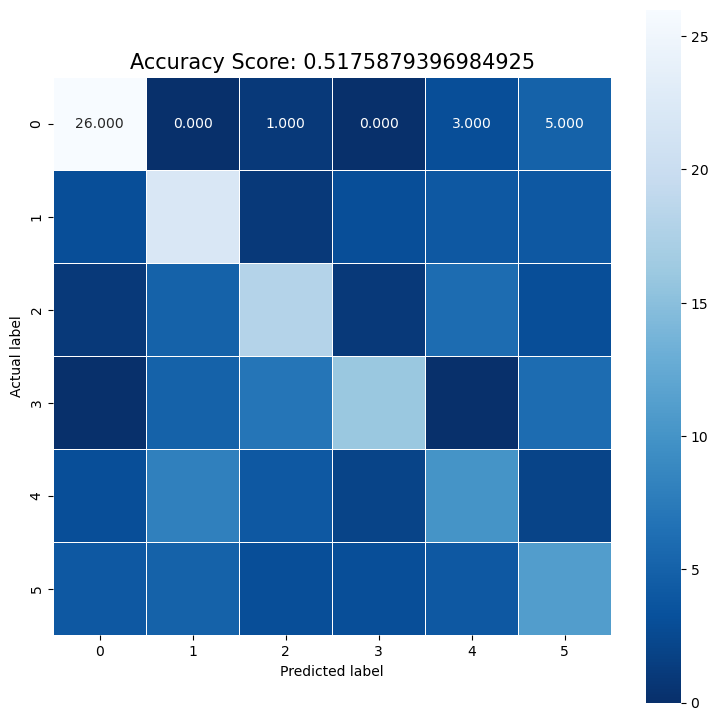

In [8]:
cm = skmetrics.confusion_matrix(y_test, predictions_test)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
all_sample_title = 'Accuracy Score: {0}'.format(score_test)
plt.title(all_sample_title, size = 15)

In [ ]:
kullback_leibler_train = skmetrics.mutual_info_score(y_train, predictions_train)
kullback_leibler_test = skmetrics.mutual_info_score(y_test, predictions_test)

print(kullback_leibler_train)
print(kullback_leibler_test)

0.00435628926865915
0.22469821037301801


In [ ]:
TRAIN_PATH = "reformatted_train_10000_samples.csv"

data = pd.read_csv(TRAIN_PATH)

data_np = data.to_numpy()

print(data_np)
print(data_np.shape)

FileNotFoundError: [Errno 2] No such file or directory: 'reformatted_train_10000_samples.csv'

In [ ]:
x = data_np[:, 0:820]
y = data_np[:, 820]

# Shuffle the dataset based on sample indices
shuffled_indices = np.random.permutation(x.shape[0])

# Choose the first 80% as training set, next 10% as validation and the rest as testing
train_split_idx = int(0.80 * x.shape[0])
val_split_idx = int(0.90 * x.shape[0])

train_indices = shuffled_indices[0:train_split_idx]
val_indices = shuffled_indices[train_split_idx:val_split_idx]
test_indices = shuffled_indices[val_split_idx:]

# Select the examples from x and y to construct our training, validation, testing sets
x_train, y_train = x[train_indices, :], y[train_indices]
x_val, y_val = x[val_indices, :], y[val_indices]
x_test, y_test = x[test_indices, :], y[test_indices]

In [ ]:
# Rerun on the optimal dataset
max_iter = 150
solver = 'newton-cg'

model = LogisticRegression(solver=solver, max_iter=max_iter) 

model.fit(x_train, y_train)

predictions_train = model.predict(x_train)
score_train = model.score(x_train, y_train)

predictions_val = model.predict(x_val)
score_val = model.score(x_val, y_val)

predictions_test = model.predict(x_test)
score_test = model.score(x_test, y_test)

print('Solver: {}, Iterations: {}'.format(solver, max_iter))
print('Training accuracy: {:0.2f}%\nValidation accuracy: {:0.2f}%\nTest accuracy: {:0.2f}%'.format(score_train*100, score_val*100, score_test*100))

c:\Users\brenn\anaconda3\envs\ml_new\lib\site-packages\sklearn\utils\optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


Solver: newton-cg, Iterations: 150
Training accuracy: 59.46%
Validation accuracy: 54.38%\Test accuracy: 54.33%
